In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
data = pd.read_csv(r"C:\CHRIST\Cognifyz\Dataset .csv")

In [3]:
# View top 10 rows of the dataset
print(data.head(10))

   Restaurant ID                           Restaurant Name  Country Code  \
0        6317637                          Le Petit Souffle           162   
1        6304287                          Izakaya Kikufuji           162   
2        6300002                    Heat - Edsa Shangri-La           162   
3        6318506                                      Ooma           162   
4        6314302                               Sambo Kojin           162   
5       18189371                              Din Tai Fung           162   
6        6300781                                Buffet 101           162   
7        6301290                                   Vikings           162   
8        6300010  Spiral - Sofitel Philippine Plaza Manila           162   
9        6314987                                  Locavore           162   

               City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati 

### Task 1: TABLE BOOKING AND ONLINE DELIVERY

In [4]:
# Percentage of restaurants that offer table booking and online delivery
total_num_restaurants = len(data)

In [5]:
table_booking_percentage = (data['Has Table booking'] == 'Yes').sum() / total_num_restaurants * 100
online_delivery_percentage = (data['Has Online delivery'] == 'Yes').sum() / total_num_restaurants * 100

In [6]:
print(f"Percentage of restaurants that offer Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants that offer Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants that offer Table Booking: 12.12%
Percentage of restaurants that offer Online Delivery: 25.66%


In [7]:
# Compare the average ratings of restaurants with table booking and those without
avg_rating_with_table = data.loc[data['Has Table booking'] == 'Yes', 'Aggregate rating'].mean()
avg_rating_without_table = data.loc[data['Has Table booking'] == 'No', 'Aggregate rating'].mean()

In [8]:
print(f"Average rating with Table Booking: {avg_rating_with_table:.2f}")
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f}")

Average rating with Table Booking: 3.44
Average rating without Table Booking: 2.56


In [9]:
# Analyze the availability of online delivery among restaurants with different price ranges
data['Price Range Category'] = np.where(data['Average Cost for two'] < 500, 'Low',
                                        np.where((data['Average Cost for two'] >= 500) & (data['Average Cost for two'] <= 1000), 'Medium', 'High'))

In [10]:
online_delivery_by_price_range = data.groupby('Price Range Category')['Has Online delivery'].value_counts(normalize=True).unstack()

In [11]:
print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Price Range Category                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791


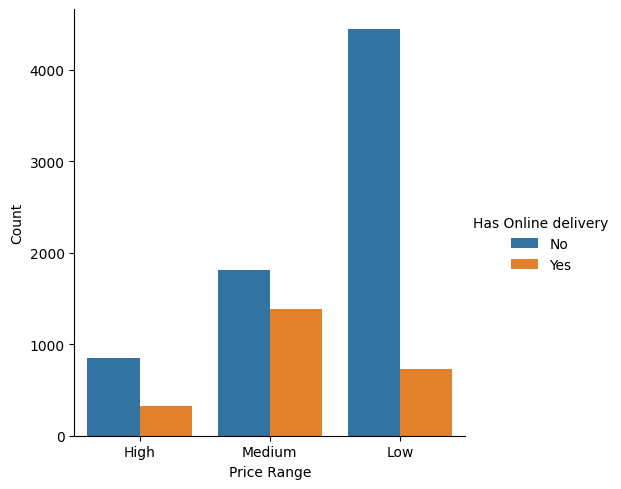

In [12]:
# Create a bar plot
g = sns.catplot(x='Price Range Category', hue='Has Online delivery', data=data, kind='count')
g.set_axis_labels("Price Range", "Count").set_titles("Online Delivery Availability by Price Range")
plt.show()

### Task 2: PRICE RANGE ANALYSIS 

In [13]:
# Determine the most common price range among all the restaurants
most_common_price_range = data['Price range'].value_counts().idxmax()
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


In [14]:
# Calculate the average rating for each price range
avg_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean().reset_index()
print("Average rating for each price range:")
print(avg_rating_by_price_range.round(2))

Average rating for each price range:
   Price range  Aggregate rating
0            1              2.00
1            2              2.94
2            3              3.68
3            4              3.82


In [15]:
# Identify the color that represents the highest average rating among different price ranges
highest_avg_rating_index = avg_rating_by_price_range['Aggregate rating'].idxmax()
colors = ['blue'] * len(avg_rating_by_price_range)
colors[highest_avg_rating_index] = 'red'

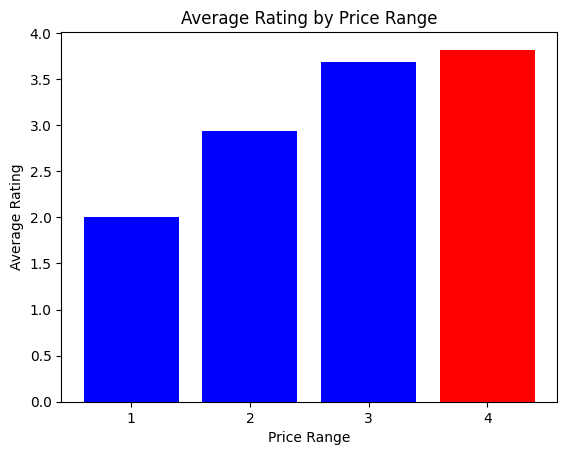

In [16]:
plt.bar(avg_rating_by_price_range['Price range'].astype(str), avg_rating_by_price_range['Aggregate rating'], color=colors)
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating by Price Range")
plt.show()

In [19]:
# Extract additional features from existing columns
data['Restaurant Name Length'] = data['Restaurant Name'].str.len()
data['Address Length'] = data['Address'].str.len()
print(data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

### Task 3: FEATURE ENGINEERING

In [18]:
# Create new features for table booking and online delivery
data['Has Table Booking'] = np.where(data['Has Table booking'] == "Yes", 1, 0)
data['Has Online Delivery'] = np.where(data['Has Online delivery'] == "Yes", 1, 0)
print(data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 